# Генерация ошибок

Сгенерированный вектор ошибок:
[ 1.26327017  1.50225411  0.          3.10887258 -0.          0.16169653
 -0.83179489  0.70906496  0.77795566  2.43625767  1.33616762 -0.51208427
  1.4104583  -1.06868452 -0.64089743  0.92463351 -1.54452436 -0.22196116
 -0.68605014  0.          1.72442164  0.33007807  1.14027615  0.53136689
  1.18891468 -0.96773703 -0.25479057  0.29354656  1.32921217 -0.32369118]

Количество ошибок: 30
Среднее значение: 0.437208
Дисперсия: 1.131089


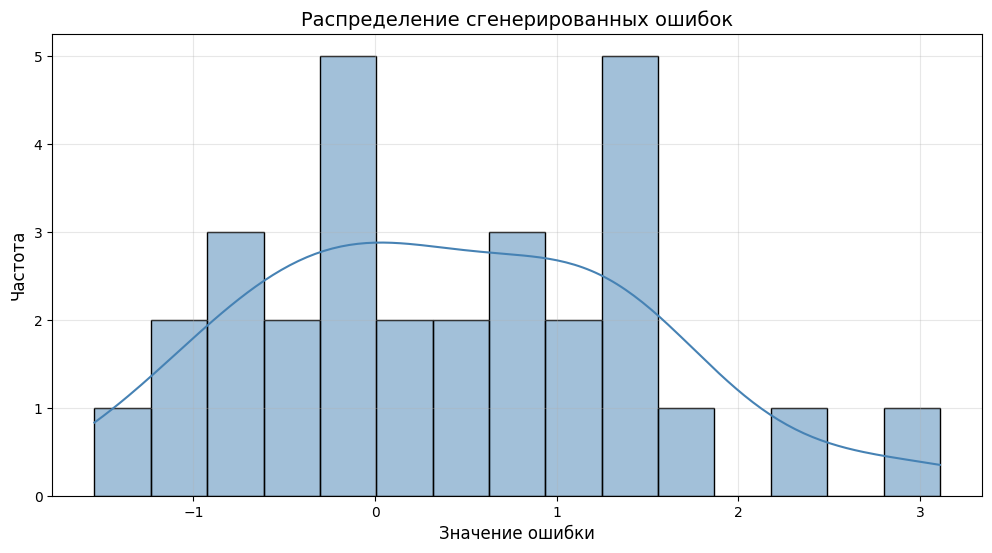

In [2]:
import numpy as np
import scipy.stats as stats
from scipy.special import gamma, psi
import math

def generate_error_vector(seed=None):
    """
    Генерирует вектор из 30 ошибок из различных распределений.
    Все распределения нормализованы к матожиданию 0 и дисперсии 1.
    
    Parameters:
    seed (int): Seed для воспроизводимости результатов
    
    Returns:
    np.array: Вектор из 30 нормализованных ошибок, перемешанных случайным образом
    """
    if seed is not None:
        np.random.seed(seed)
    
    errors = []
    
    # ===== Группа 1: Классические симметричные распределения =====
    
    # 1. Нормальное распределение
    errors.append(np.random.normal(0, 1))
    
    # 2. Логистическое распределение (scale = sqrt(3)/pi для дисперсии 1)
    scale_logistic = np.sqrt(3) / np.pi
    errors.append(stats.logistic.rvs(loc=0, scale=scale_logistic))
    
    # 3. Распределение Лапласа (scale = 1/sqrt(2) для дисперсии 1)
    scale_laplace = 1 / np.sqrt(2)
    errors.append(stats.laplace.rvs(loc=0, scale=scale_laplace))
    
    # 4. Гиперболический секанс (scale = sqrt(2)/pi для дисперсии 1)
    scale_hypsec = np.sqrt(2) / np.pi
    errors.append(stats.hypsecant.rvs(loc=0, scale=scale_hypsec))
    
    # 5. Обобщенное нормальное (beta=0.5)
    beta = 0.5
    # Масштабный параметр для дисперсии 1
    scale_gennorm = (gamma(3/beta) / gamma(1/beta)) ** (beta/2)
    raw = stats.gennorm.rvs(beta=beta, scale=1)
    errors.append(raw / scale_gennorm)
    
    # ===== Группа 2: Распределения с тяжелыми хвостами =====
    
    # 6. Распределение Стьюдента (df=3)
    df_t3 = 3
    raw = stats.t.rvs(df=df_t3)
    # Нормализация: дисперсия t-распределения = df/(df-2) для df>2
    scale_t3 = np.sqrt(df_t3 / (df_t3 - 2))
    errors.append(raw / scale_t3)
    
    # 7. Распределение Стьюдента (df=30)
    df_t30 = 30
    raw = stats.t.rvs(df=df_t30)
    scale_t30 = np.sqrt(df_t30 / (df_t30 - 2))
    errors.append(raw / scale_t30)
    
    # 8. Двойное Вейбулла (c=1.5)
    c_dw1 = 1.5
    raw = stats.dweibull.rvs(c=c_dw1)
    # Нормализация по эмпирическим моментам
    scale_dw1 = np.sqrt(stats.dweibull.var(c=c_dw1))
    errors.append((raw - stats.dweibull.mean(c=c_dw1)) / scale_dw1)
    
    # 9. Двойное Вейбулла (c=3.5)
    c_dw2 = 3.5
    raw = stats.dweibull.rvs(c=c_dw2)
    scale_dw2 = np.sqrt(stats.dweibull.var(c=c_dw2))
    errors.append((raw - stats.dweibull.mean(c=c_dw2)) / scale_dw2)
    
    # 10. Устойчивое распределение (alpha=1.8)
    alpha_stable = 1.8
    beta_stable = 0  # симметричное
    raw = stats.levy_stable.rvs(alpha=alpha_stable, beta=beta_stable)
    # Для alpha=1.8 дисперсия конечна, находим эмпирическую дисперсию
    scale_stable = np.sqrt(stats.levy_stable.var(alpha=alpha_stable, beta=beta_stable))
    errors.append(raw / scale_stable)
    
    # ===== Группа 3: Распределения экстремальных значений =====
    
    # 11. Гумбель для максимумов
    raw = stats.gumbel_r.rvs()
    mu_gumbel = np.euler_gamma  # константа Эйлера
    sigma_gumbel = np.pi / np.sqrt(6)
    errors.append((raw - mu_gumbel) / sigma_gumbel)
    
    # 12. Гумбель для минимумов
    raw = stats.gumbel_l.rvs()
    errors.append((raw - mu_gumbel) / sigma_gumbel)
    
    # 13. Обобщенное экстремальное (c=0.5)
    c_gev1 = 0.5
    raw = stats.genextreme.rvs(c=c_gev1)
    scale_gev1 = np.sqrt(stats.genextreme.var(c=c_gev1))
    errors.append((raw - stats.genextreme.mean(c=c_gev1)) / scale_gev1)
    
    # 14. Обобщенное экстремальное (c=-0.5)
    c_gev2 = -0.5
    raw = stats.genextreme.rvs(c=c_gev2)
    scale_gev2 = np.sqrt(stats.genextreme.var(c=c_gev2))
    errors.append((raw - stats.genextreme.mean(c=c_gev2)) / scale_gev2)
    
    # 15. Распределение Мояла
    raw = stats.moyal.rvs()
    mu_moyal = np.log(4) + np.euler_gamma
    sigma_moyal = np.pi / np.sqrt(2)
    errors.append((raw - mu_moyal) / sigma_moyal)
    
    # ===== Группа 4: Скошенные (асимметричные) распределения =====
    
    # 16. Скошенное нормальное (a=5)
    a_skew1 = 5
    raw = stats.skewnorm.rvs(a=a_skew1)
    scale_skew1 = np.sqrt(stats.skewnorm.var(a=a_skew1))
    errors.append((raw - stats.skewnorm.mean(a=a_skew1)) / scale_skew1)
    
    # 17. Скошенное нормальное (a=-5)
    a_skew2 = -5
    raw = stats.skewnorm.rvs(a=a_skew2)
    scale_skew2 = np.sqrt(stats.skewnorm.var(a=a_skew2))
    errors.append((raw - stats.skewnorm.mean(a=a_skew2)) / scale_skew2)
    
    # 18. Нецентральное t (df=10, nc=3)
    df_nct = 10
    nc_nct = 3
    raw = stats.nct.rvs(df=df_nct, nc=nc_nct)
    scale_nct = np.sqrt(stats.nct.var(df=df_nct, nc=nc_nct))
    errors.append((raw - stats.nct.mean(df=df_nct, nc=nc_nct)) / scale_nct)
    
    # 19. Экспоненциально модифицированное нормальное (K=1)
    K_emg1 = 1
    mu_emg = 0
    sigma_emg = 1
    raw = stats.exponnorm.rvs(K=K_emg1, loc=mu_emg, scale=sigma_emg)
    scale_emg1 = np.sqrt(stats.exponnorm.var(K=K_emg1, loc=mu_emg, scale=sigma_emg))
    errors.append((raw - stats.exponnorm.mean(K=K_emg1, loc=mu_emg, scale=sigma_emg)) / scale_emg1)
    
    # 20. Экспоненциально модифицированное нормальное (K=2)
    K_emg2 = 2
    raw = stats.exponnorm.rvs(K=K_emg2, loc=mu_emg, scale=sigma_emg)
    scale_emg2 = np.sqrt(stats.exponnorm.var(K=K_emg2, loc=mu_emg, scale=sigma_emg))
    errors.append((raw - stats.exponnorm.mean(K=K_emg2, loc=mu_emg, scale=sigma_emg)) / scale_emg2)
    
    # ===== Группа 5: Специальные распределения =====
    
    # 21. Распределение Джонсона SU (a=2, b=1)
    a_johnson1 = 2
    b_johnson1 = 1
    raw = stats.johnsonsu.rvs(a=a_johnson1, b=b_johnson1)
    scale_johnson1 = np.sqrt(stats.johnsonsu.var(a=a_johnson1, b=b_johnson1))
    errors.append((raw - stats.johnsonsu.mean(a=a_johnson1, b=b_johnson1)) / scale_johnson1)
    
    # 22. Распределение Джонсона SU (a=0.5, b=2)
    a_johnson2 = 0.5
    b_johnson2 = 2
    raw = stats.johnsonsu.rvs(a=a_johnson2, b=b_johnson2)
    scale_johnson2 = np.sqrt(stats.johnsonsu.var(a=a_johnson2, b=b_johnson2))
    errors.append((raw - stats.johnsonsu.mean(a=a_johnson2, b=b_johnson2)) / scale_johnson2)
    
    # 23. Обобщенное логистическое (c=0.5)
    c_genlogistic1 = 0.5
    raw = stats.genlogistic.rvs(c=c_genlogistic1)
    scale_genlogistic1 = np.sqrt(stats.genlogistic.var(c=c_genlogistic1))
    errors.append((raw - stats.genlogistic.mean(c=c_genlogistic1)) / scale_genlogistic1)
    
    # 24. Обобщенное логистическое (c=2.0)
    c_genlogistic2 = 2.0
    raw = stats.genlogistic.rvs(c=c_genlogistic2)
    scale_genlogistic2 = np.sqrt(stats.genlogistic.var(c=c_genlogistic2))
    errors.append((raw - stats.genlogistic.mean(c=c_genlogistic2)) / scale_genlogistic2)
    
    # 25. Распределение Тьюки (lambda=0.5)
    lmbda_tukey1 = 0.5
    raw = stats.tukeylambda.rvs(lam=lmbda_tukey1)  # заменить lmbda на lam
    scale_tukey1 = np.sqrt(stats.tukeylambda.var(lam=lmbda_tukey1))
    errors.append((raw - stats.tukeylambda.mean(lam=lmbda_tukey1)) / scale_tukey1)

    # 26. Распределение Тьюки (lambda=-0.5)
    lmbda_tukey2 = -0.5
    raw = stats.tukeylambda.rvs(lam=lmbda_tukey2)  # заменить lmbda на lam
    scale_tukey2 = np.sqrt(stats.tukeylambda.var(lam=lmbda_tukey2))
    errors.append((raw - stats.tukeylambda.mean(lam=lmbda_tukey2)) / scale_tukey2)
    
    # ===== Группа 6: Менее известные, но интересные распределения =====
    
    # 27. R-распределение (c=0.5)
    c_rdist1 = 0.5
    raw = stats.rdist.rvs(c=c_rdist1)
    scale_rdist1 = np.sqrt(stats.rdist.var(c=c_rdist1))
    errors.append((raw - stats.rdist.mean(c=c_rdist1)) / scale_rdist1)
    
    # 28. R-распределение (c=2.0)
    c_rdist2 = 2.0
    raw = stats.rdist.rvs(c=c_rdist2)
    scale_rdist2 = np.sqrt(stats.rdist.var(c=c_rdist2))
    errors.append((raw - stats.rdist.mean(c=c_rdist2)) / scale_rdist2)
    
    # 29. Степенное нормальное (c=0.3)
    c_powernorm1 = 0.3
    raw = stats.powerlaw.rvs(c_powernorm1)  # Используем powerlaw как приближение
    scale_powernorm1 = np.sqrt(stats.powerlaw.var(c_powernorm1))
    errors.append((raw - stats.powerlaw.mean(c_powernorm1)) / scale_powernorm1)
    
    # 30. Степенное нормальное (c=0.8)
    c_powernorm2 = 0.8
    raw = stats.powerlaw.rvs(c_powernorm2)
    scale_powernorm2 = np.sqrt(stats.powerlaw.var(c_powernorm2))
    errors.append((raw - stats.powerlaw.mean(c_powernorm2)) / scale_powernorm2)
    
    # Проверка количества ошибок
    assert len(errors) == 30, f"Ожидалось 30 ошибок, получено {len(errors)}"
    
    # Перемешиваем ошибки
    np.random.shuffle(errors)
    
    return np.array(errors)

# Пример использования:
if __name__ == "__main__":
    # Генерируем вектор ошибок с фиксированным seed
    errors = generate_error_vector(seed=24)
    
    print("Сгенерированный вектор ошибок:")
    print(errors)
    print(f"\nКоличество ошибок: {len(errors)}")
    print(f"Среднее значение: {np.mean(errors):.6f}")
    print(f"Дисперсия: {np.var(errors):.6f}")
    
    # Визуализация распределения ошибок
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    plt.figure(figsize=(12, 6))
    sns.histplot(errors, bins=15, kde=True, color='steelblue')
    plt.title('Распределение сгенерированных ошибок', fontsize=14)
    plt.xlabel('Значение ошибки', fontsize=12)
    plt.ylabel('Частота', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

# Генерация полиномиальных данных

In [3]:
import numpy as np

def generate_polynomial(seed, degree, coeff_scale=15.0, coeff_offset=8.0):
    """
    Генерирует значения полинома заданной степени для 30 точек в диапазоне X [0, 1].
    
    Parameters:
    seed (int): Seed для воспроизводимости
    degree (int): Степень полинома
    coeff_scale (float): Масштаб коэффициентов (разброс)
    coeff_offset (float): Смещение для коэффициентов, чтобы избежать близких к нулю значений
    
    Returns:
    np.array: Вектор из 30 значений полинома
    np.array: Вектор из 30 значений X
    """
    # Устанавливаем seed для воспроизводимости
    np.random.seed(seed)
    
    # 1) Генерируем 30 точек X из равномерного распределения на [0, 1]
    X = np.random.uniform(0, 1, 30)
    
    # 2) Генерируем коэффициенты полинома с увеличенным масштабом для компенсации малых значений x^k
    signs = np.random.choice([-1, 1], size=degree+1)
    magnitudes = np.abs(np.random.normal(0, 1, degree+1)) * coeff_scale + coeff_offset
    coefficients = signs * magnitudes
    
    # 3) Рассчитываем значения полинома для каждой точки
    y = np.zeros(30)
    for i in range(30):
        x_val = X[i]
        poly_value = 0
        for exp in range(degree + 1):
            poly_value += coefficients[exp] * (x_val ** exp)
        y[i] = poly_value
    
    return y, X

## Генерация полиномиальных датасетов с ошибками

## Общее тестирование

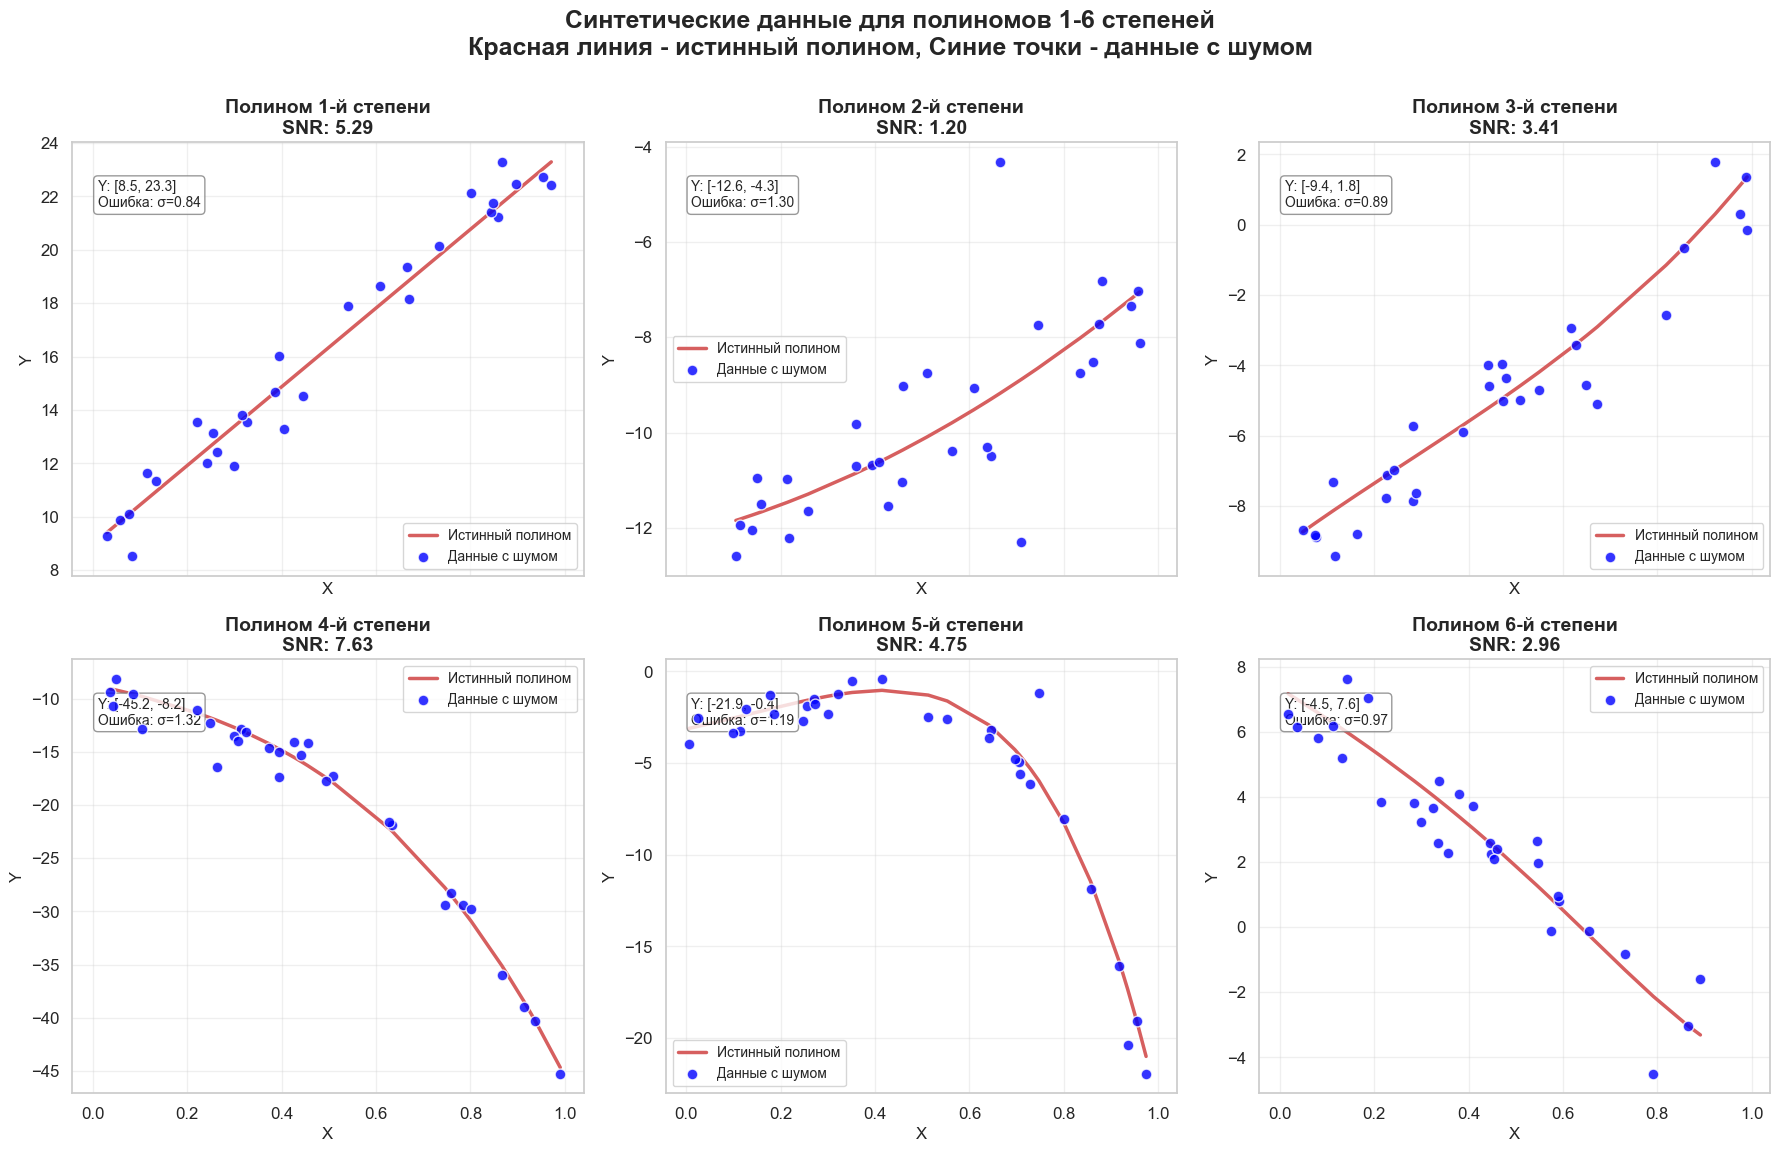

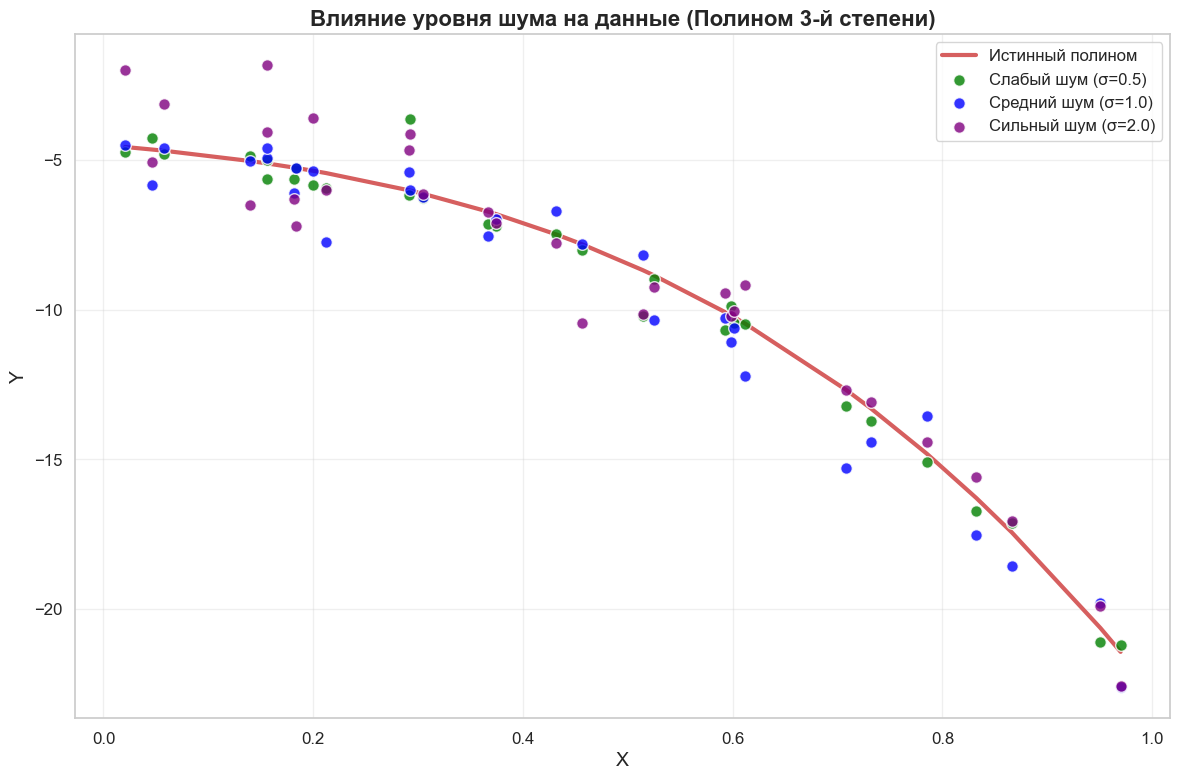

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем стиль для визуализации
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Фиксированный seed для воспроизводимости
base_seed = 42

# Создаем сетку графиков 2x3 для полиномов 1-6 степеней
fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharex=True)
axes = axes.flatten()

# Параметры для более сбалансированных полиномов
coeff_scale = 5.0    # Уменьшаем масштаб коэффициентов
coeff_offset = 1.5   # Уменьшаем смещение

# Генерируем данные для каждой степени полинома (1-6)
for i, degree in enumerate(range(1, 7)):
    # Генерируем точки полинома с новыми параметрами
    y_true, X = generate_polynomial(
        seed=base_seed + degree, 
        degree=degree,
        coeff_scale=coeff_scale,
        coeff_offset=coeff_offset
    )
    
    # Генерируем вектор ошибок
    errors = generate_error_vector(seed=base_seed + degree)
    
    # Добавляем ошибки к истинным значениям
    y_noisy = y_true + errors
    
    # Сортируем X для красивого отображения полинома
    sort_idx = np.argsort(X)
    X_sorted = X[sort_idx]
    y_true_sorted = y_true[sort_idx]
    
    # Построение графика
    ax = axes[i]
    
    # Строим истинный полином (гладкая линия)
    ax.plot(X_sorted, y_true_sorted, 'r-', linewidth=2.5, label='Истинный полином')
    
    # Строим точки с шумом
    ax.scatter(X, y_noisy, color='blue', s=60, alpha=0.8, edgecolors='w', 
               linewidth=1, zorder=10, label='Данные с шумом')
    
    # Вычисляем отношение сигнала к шуму для оценки влияния ошибок
    signal_to_noise = np.std(y_true) / np.std(errors)
    
    # Настраиваем график
    ax.set_title(f'Полином {degree}-й степени\nSNR: {signal_to_noise:.2f}', fontsize=14, fontweight='bold')
    ax.set_xlabel('X', fontsize=12)
    ax.set_ylabel('Y', fontsize=12)
    ax.legend(loc='best', fontsize=10)
    ax.grid(True, alpha=0.3)
    
    # Добавляем информацию о диапазоне значений и статистике ошибок
    y_range = f"Y: [{np.min(y_noisy):.1f}, {np.max(y_noisy):.1f}]"
    error_stats = f"Ошибка: σ={np.std(errors):.2f}"
    ax.annotate(f"{y_range}\n{error_stats}", xy=(0.05, 0.85), xycoords='axes fraction', 
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
                fontsize=10)

# Настраиваем общий заголовок
plt.suptitle('Синтетические данные для полиномов 1-6 степеней\n'
             'Красная линия - истинный полином, Синие точки - данные с шумом', 
             fontsize=18, fontweight='bold', y=0.96)

# Автоматическая подгонка layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Сохраняем результат
plt.savefig('polynomial_degrees_1-6.png', dpi=300, bbox_inches='tight')

# Отображаем график
plt.show()

# Дополнительная визуализация: сравнение одного примера с разными уровнями шума
fig, ax = plt.subplots(figsize=(12, 8))

# Генерируем данные для полинома 3-й степени
degree = 3
y_true, X = generate_polynomial(
    seed=base_seed, 
    degree=degree,
    coeff_scale=coeff_scale,
    coeff_offset=coeff_offset
)

# Генерируем несколько наборов ошибок с разными масштабами
scales = [0.5, 1.0, 2.0]  # разные уровни шума
colors = ['green', 'blue', 'purple']
labels = ['Слабый шум (σ=0.5)', 'Средний шум (σ=1.0)', 'Сильный шум (σ=2.0)']

# Сортируем для красивого отображения
sort_idx = np.argsort(X)
X_sorted = X[sort_idx]
y_true_sorted = y_true[sort_idx]

# Строим истинный полином
ax.plot(X_sorted, y_true_sorted, 'r-', linewidth=3, label='Истинный полином')

# Для каждого уровня шума генерируем данные и строим график
for scale, color, label in zip(scales, colors, labels):
    # Генерируем ошибки
    errors = generate_error_vector(seed=base_seed + int(scale * 10))
    # Масштабируем ошибки
    scaled_errors = errors * scale
    y_noisy = y_true + scaled_errors
    
    # Строим точки с шумом
    ax.scatter(X, y_noisy, color=color, s=70, alpha=0.8, edgecolors='w', 
               linewidth=1, zorder=10, label=f'{label}')

# Настраиваем график
ax.set_title(f'Влияние уровня шума на данные (Полином {degree}-й степени)', fontsize=16, fontweight='bold')
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Y', fontsize=14)
ax.legend(loc='best', fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('noise_levels_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## 1 степень (линейная регрессия)

Оптимальные параметры для полинома 1-й степени (SNR 1-3):
coeff_scale=0.5, coeff_offset=3.0, SNR=1.04
coeff_scale=0.5, coeff_offset=5.0, SNR=1.63
coeff_scale=1.0, coeff_offset=3.0, SNR=1.18
coeff_scale=1.0, coeff_offset=5.0, SNR=1.77
coeff_scale=2.0, coeff_offset=1.5, SNR=1.01
coeff_scale=2.0, coeff_offset=2.0, SNR=1.16
coeff_scale=2.0, coeff_offset=3.0, SNR=1.46
coeff_scale=2.0, coeff_offset=5.0, SNR=2.06
coeff_scale=3.0, coeff_offset=1.0, SNR=1.15
coeff_scale=3.0, coeff_offset=1.5, SNR=1.30
coeff_scale=3.0, coeff_offset=2.0, SNR=1.44
coeff_scale=3.0, coeff_offset=3.0, SNR=1.74
coeff_scale=3.0, coeff_offset=5.0, SNR=2.34
coeff_scale=4.0, coeff_offset=0.1, SNR=1.16
coeff_scale=4.0, coeff_offset=0.5, SNR=1.28
coeff_scale=4.0, coeff_offset=1.0, SNR=1.43
coeff_scale=4.0, coeff_offset=1.5, SNR=1.58
coeff_scale=4.0, coeff_offset=2.0, SNR=1.73
coeff_scale=4.0, coeff_offset=3.0, SNR=2.03
coeff_scale=4.0, coeff_offset=5.0, SNR=2.62
coeff_scale=5.0, coeff_offset=0.1, SNR=1.44
coeff_scale=5.0, c

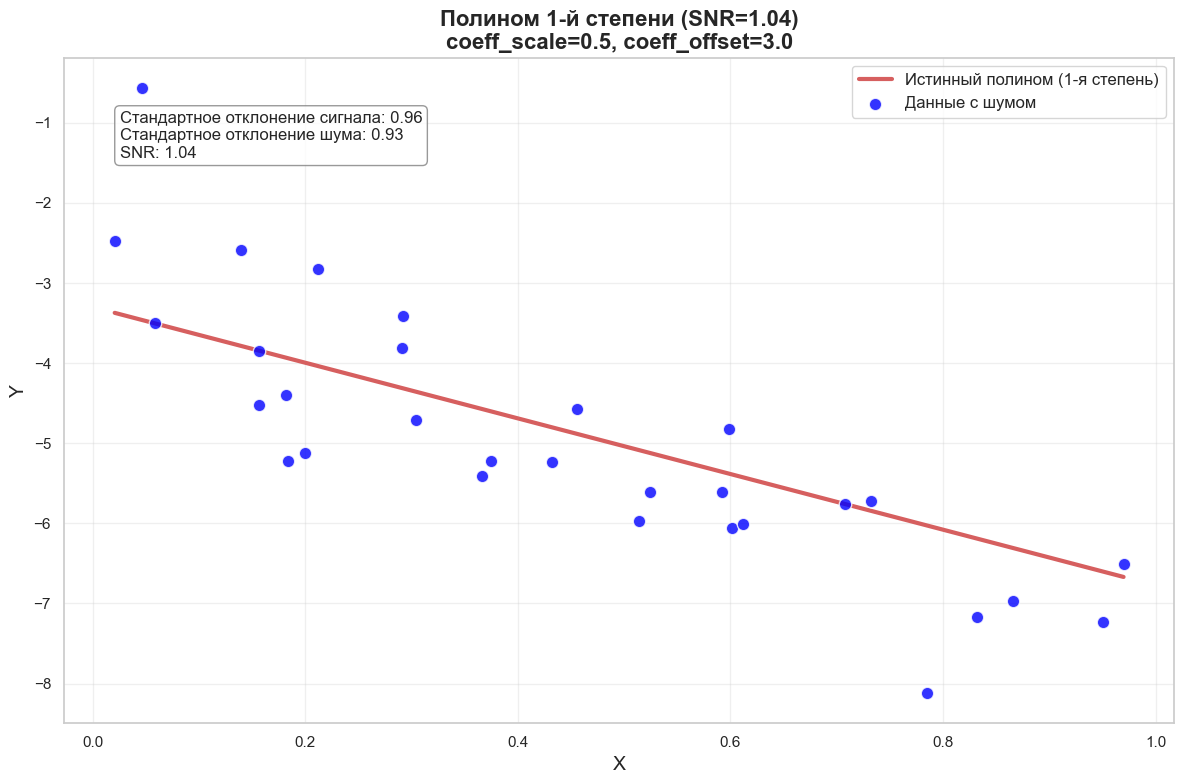


Давайте протестируем несколько конкретных вариантов:


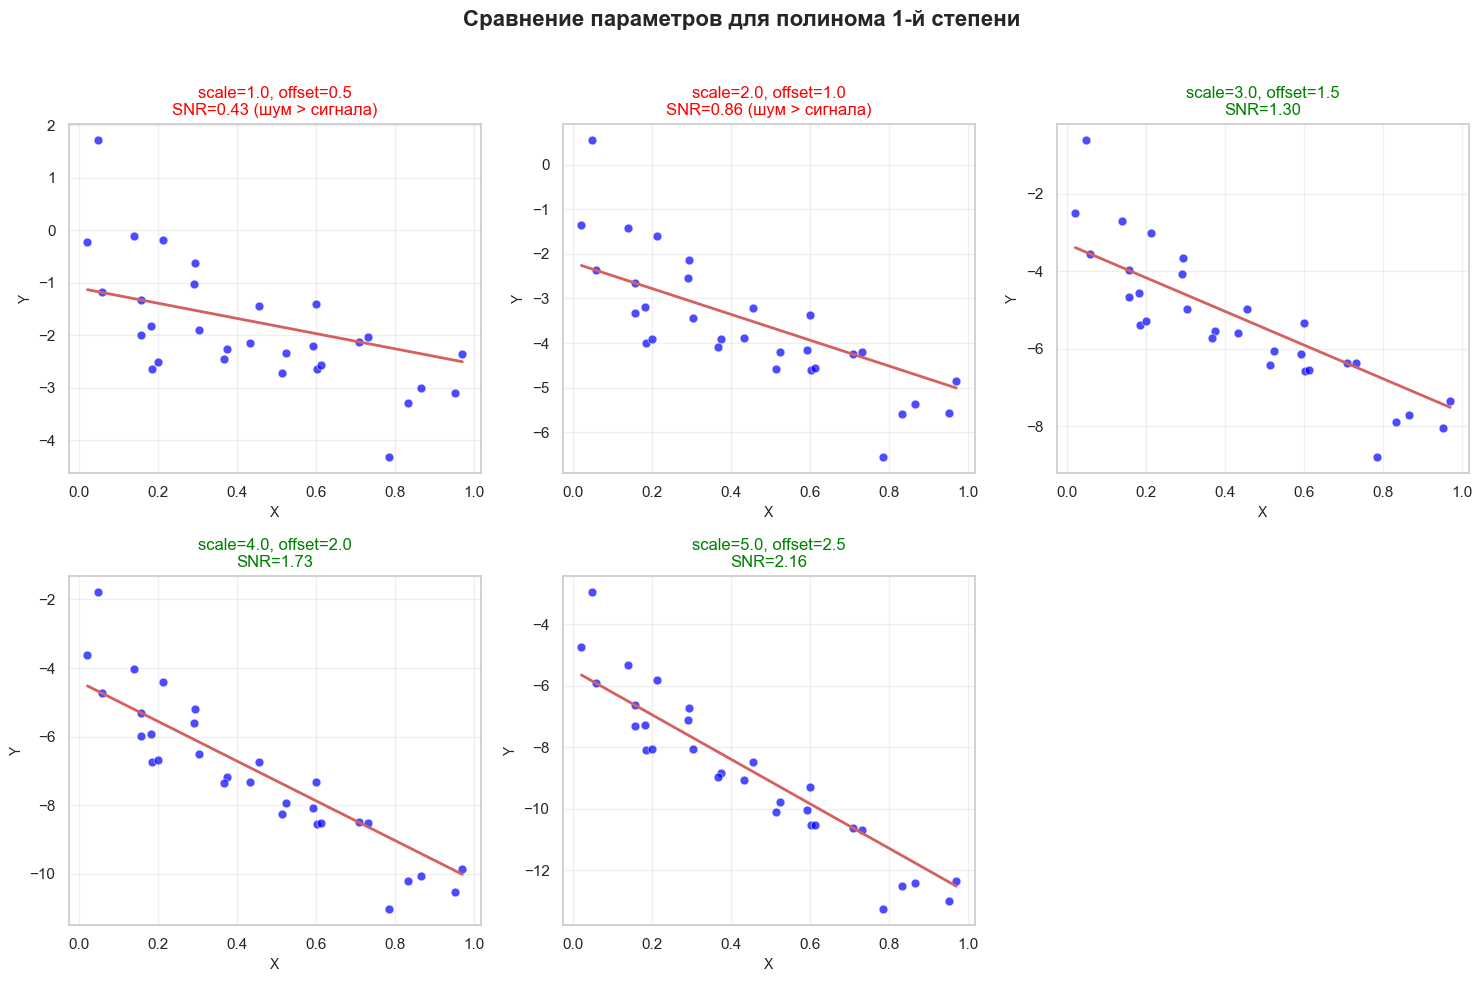

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def test_degree1_parameters(coeff_scale, coeff_offset, seed=42):
    """
    Тестирует параметры для полинома 1-й степени и возвращает SNR
    """
    # Генерируем полином 1-й степени
    y_true, X = generate_polynomial(
        seed=seed,
        degree=1,
        coeff_scale=coeff_scale,
        coeff_offset=coeff_offset
    )
    
    # Генерируем ошибки
    errors = generate_error_vector(seed=seed)
    
    # Вычисляем SNR
    snr = np.std(y_true) / np.std(errors)
    
    return snr, y_true, X, errors

def find_optimal_parameters_for_degree1(target_snr_range=(1.0, 3.0), seed=42):
    """
    Находит оптимальные параметры для полинома 1-й степени
    """
    results = []
    
    # Тестируем различные комбинации параметров
    scale_values = [0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0]
    offset_values = [0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 5.0]
    
    for scale in scale_values:
        for offset in offset_values:
            snr, _, _, _ = test_degree1_parameters(scale, offset, seed)
            results.append((scale, offset, snr))
    
    # Фильтруем результаты по целевому диапазону SNR
    optimal = [(s, o, snr) for s, o, snr in results if target_snr_range[0] <= snr <= target_snr_range[1]]
    
    return optimal, results

# Находим оптимальные параметры
optimal_params, all_results = find_optimal_parameters_for_degree1(seed=42)

print("Оптимальные параметры для полинома 1-й степени (SNR 1-3):")
for scale, offset, snr in optimal_params:
    print(f"coeff_scale={scale}, coeff_offset={offset}, SNR={snr:.2f}")

# Если не нашли оптимальных параметров, показываем ближайшие варианты
if not optimal_params:
    print("\nНе найдено параметров в целевом диапазоне. Ближайшие варианты:")
    # Сортируем по близости к целевому диапазону
    target_mid = (1.0 + 3.0) / 2
    sorted_results = sorted(all_results, key=lambda x: abs(x[2] - target_mid))
    for scale, offset, snr in sorted_results[:5]:
        print(f"coeff_scale={scale}, coeff_offset={offset}, SNR={snr:.2f}")

# Визуализируем один из оптимальных вариантов
if optimal_params:
    best_params = optimal_params[0]  # берем первый оптимальный вариант
    scale, offset, snr = best_params
    
    print(f"\nВизуализация для лучших параметров: coeff_scale={scale}, coeff_offset={offset}, SNR={snr:.2f}")
    
    snr, y_true, X, errors = test_degree1_parameters(scale, offset, seed=42)
    y_noisy = y_true + errors
    
    # Сортируем для красивого отображения
    sort_idx = np.argsort(X)
    X_sorted = X[sort_idx]
    y_true_sorted = y_true[sort_idx]
    
    # Строим график
    plt.figure(figsize=(12, 8))
    sns.set(style="whitegrid", palette="muted")
    
    plt.plot(X_sorted, y_true_sorted, 'r-', linewidth=3, label=f'Истинный полином (1-я степень)')
    plt.scatter(X, y_noisy, color='blue', s=80, alpha=0.8, edgecolors='w', 
               linewidth=1, zorder=10, label='Данные с шумом')
    
    plt.title(f'Полином 1-й степени (SNR={snr:.2f})\ncoeff_scale={scale}, coeff_offset={offset}', 
              fontsize=16, fontweight='bold')
    plt.xlabel('X', fontsize=14)
    plt.ylabel('Y', fontsize=14)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Добавляем статистику
    stats_text = (f"Стандартное отклонение сигнала: {np.std(y_true):.2f}\n"
                  f"Стандартное отклонение шума: {np.std(errors):.2f}\n"
                  f"SNR: {snr:.2f}")
    plt.annotate(stats_text, xy=(0.05, 0.85), xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
                fontsize=12)
    
    plt.tight_layout()
    plt.savefig('degree1_optimal_params.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("\nПопробуем подобрать параметры вручную. Давайте протестируем несколько вариантов.")

# Интерактивный подбор параметров
print("\nДавайте протестируем несколько конкретных вариантов:")
test_cases = [
    (1.0, 0.5),
    (2.0, 1.0),
    (3.0, 1.5),
    (4.0, 2.0),
    (5.0, 2.5)
]

plt.figure(figsize=(15, 10))
sns.set(style="whitegrid", palette="muted")

for i, (scale, offset) in enumerate(test_cases):
    snr, y_true, X, errors = test_degree1_parameters(scale, offset, seed=42)
    y_noisy = y_true + errors
    
    # Сортируем для красивого отображения
    sort_idx = np.argsort(X)
    X_sorted = X[sort_idx]
    y_true_sorted = y_true[sort_idx]
    
    plt.subplot(2, 3, i+1)
    plt.plot(X_sorted, y_true_sorted, 'r-', linewidth=2, label=f'Полином 1-й степени')
    plt.scatter(X, y_noisy, color='blue', s=40, alpha=0.7, edgecolors='w', linewidth=0.5)
    
    plt.title(f'scale={scale}, offset={offset}\nSNR={snr:.2f}', fontsize=12)
    plt.xlabel('X', fontsize=10)
    plt.ylabel('Y', fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # Добавляем цветовую индикацию качества SNR
    if 1.0 <= snr <= 3.0:
        plt.title(f'scale={scale}, offset={offset}\nSNR={snr:.2f}', fontsize=12, color='green')
    elif snr < 1.0:
        plt.title(f'scale={scale}, offset={offset}\nSNR={snr:.2f} (шум > сигнала)', fontsize=12, color='red')
    else:
        plt.title(f'scale={scale}, offset={offset}\nSNR={snr:.2f} (сигнал > шума)', fontsize=12, color='orange')

plt.suptitle('Сравнение параметров для полинома 1-й степени', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('degree1_parameter_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

Целевой SNR: 1.749
Фактический SNR: 1.795
Использованные параметры: coeff_scale=2.0, coeff_offset=0.3


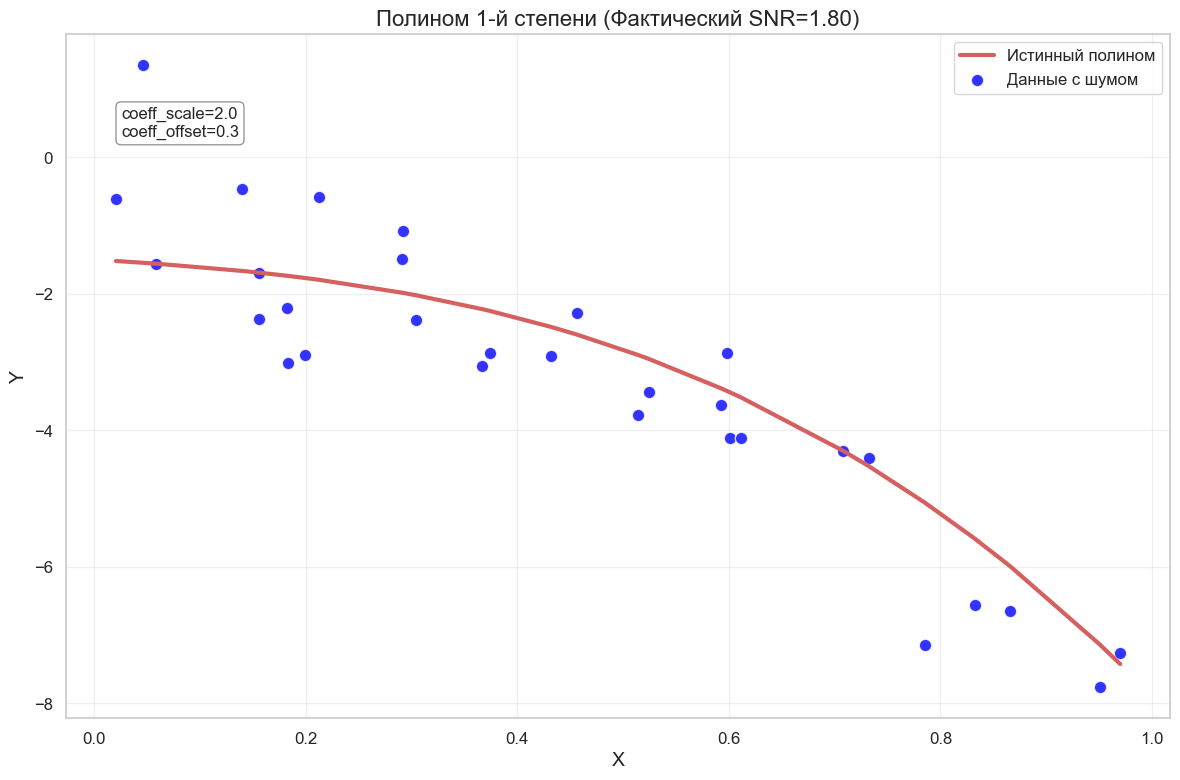

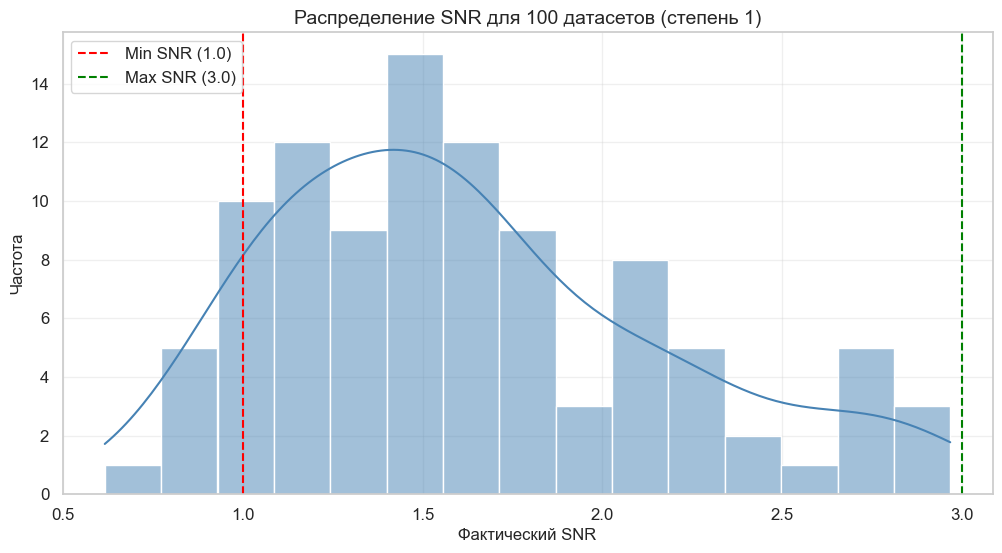

Статистика SNR для 100 датасетов:
Минимальный SNR: 0.617
Максимальный SNR: 2.967
Средний SNR: 1.624
Стандартное отклонение: 0.543


In [15]:
import numpy as np
from scipy.interpolate import griddata

def generate_dataset_with_target_snr(snr_range, degree, seed):
    """
    Генерирует датасет с SNR в заданном диапазоне, используя единый seed для всего процесса.
    
    Parameters:
    snr_range (tuple): Диапазон целевых SNR (min, max)
    degree (int): Степень полинома
    seed (int): Seed для воспроизводимости
    
    Returns:
    tuple: (X, y_noisy, y_true, snr_actual, target_snr, best_scale, best_offset)
    """
    # Устанавливаем seed для воспроизводимости всего процесса
    np.random.seed(seed)
    
    # 1. Определяем целевой SNR в диапазоне
    snr_min, snr_max = snr_range
    target_snr = snr_min + (snr_max - snr_min) * np.random.rand()
    
    # 2. Создаем сетку параметров
    scale_values = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 6.0, 8.0, 10.0])
    offset_values = np.array([0.1, 0.3, 0.5, 0.8, 1.0, 1.2, 1.5, 2.0, 2.5, 3.0])
    
    # 3. Инициализируем переменные для хранения лучших результатов
    best_dataset = None
    best_params = None
    min_diff = float('inf')
    
    # 4. Тестируем все комбинации параметров с текущим seed
    for scale in scale_values:
        for offset in offset_values:
            # Генерируем полином с текущими параметрами
            y_true, X = generate_polynomial(
                seed=seed,  # Используем исходный seed
                degree=degree,
                coeff_scale=scale,
                coeff_offset=offset
            )
            
            # Генерируем ошибки с тем же seed
            errors = generate_error_vector(seed=seed)
            
            # Вычисляем фактический SNR
            snr_actual = np.std(y_true) / np.std(errors)
            
            # Вычисляем разницу с целевым SNR
            diff = abs(snr_actual - target_snr)
            
            # Если текущая комбинация лучше предыдущей, сохраняем её
            if diff < min_diff:
                min_diff = diff
                best_params = (scale, offset)
                best_dataset = (X.copy(), (y_true + errors).copy(), y_true.copy(), snr_actual)
    
    # 5. Возвращаем лучший найденный датасет
    best_scale, best_offset = best_params
    X, y_noisy, y_true, snr_actual = best_dataset
    
    return X, y_noisy, y_true, snr_actual, target_snr, best_scale, best_offset

# Пример использования и визуализации для проверки равномерности распределения SNR:
def test_snr_distribution(snr_range=(1.0, 3.0), degree=1, num_datasets=100):
    """
    Тестирует распределение SNR для множества датасетов
    """
    snr_values = []
    
    for i in range(num_datasets):
        _, _, _, snr_actual, _, _, _ = generate_dataset_with_target_snr(
            snr_range=snr_range,
            degree=degree,
            seed=i  # Используем разные seed
        )
        snr_values.append(snr_actual)
    
    # Визуализация распределения SNR
    plt.figure(figsize=(12, 6))
    sns.histplot(snr_values, bins=15, kde=True, color='steelblue')
    plt.axvline(snr_range[0], color='red', linestyle='--', label=f'Min SNR ({snr_range[0]})')
    plt.axvline(snr_range[1], color='green', linestyle='--', label=f'Max SNR ({snr_range[1]})')
    plt.title(f'Распределение SNR для {num_datasets} датасетов (степень {degree})', fontsize=14)
    plt.xlabel('Фактический SNR', fontsize=12)
    plt.ylabel('Частота', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Статистика
    print(f"Статистика SNR для {num_datasets} датасетов:")
    print(f"Минимальный SNR: {min(snr_values):.3f}")
    print(f"Максимальный SNR: {max(snr_values):.3f}")
    print(f"Средний SNR: {np.mean(snr_values):.3f}")
    print(f"Стандартное отклонение: {np.std(snr_values):.3f}")
    
    return snr_values

# Пример генерации одного датасета:
if __name__ == "__main__":
    # Генерируем один датасет для полинома 1-й степени с SNR в диапазоне 1-3
    X, y_noisy, y_true, snr_actual, target_snr, best_scale, best_offset = generate_dataset_with_target_snr(
        snr_range=(1.0, 3.0),
        degree=3,
        seed=42
    )
    
    print(f"Целевой SNR: {target_snr:.3f}")
    print(f"Фактический SNR: {snr_actual:.3f}")
    print(f"Использованные параметры: coeff_scale={best_scale}, coeff_offset={best_offset}")
    
    # Визуализация датасета
    plt.figure(figsize=(12, 8))
    sort_idx = np.argsort(X)
    
    plt.plot(X[sort_idx], y_true[sort_idx], 'r-', linewidth=3, label='Истинный полином')
    plt.scatter(X, y_noisy, color='blue', s=80, alpha=0.8, edgecolors='w', linewidth=1, label='Данные с шумом')
    
    plt.title(f'Полином {1}-й степени (Фактический SNR={snr_actual:.2f})', fontsize=16)
    plt.xlabel('X', fontsize=14)
    plt.ylabel('Y', fontsize=14)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    stats_text = f"coeff_scale={best_scale}\ncoeff_offset={best_offset}"
    plt.annotate(stats_text, xy=(0.05, 0.85), xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
                fontsize=12)
    
    plt.tight_layout()
    plt.savefig('dataset_with_target_snr.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Тест распределения SNR для 100 датасетов
    snr_values = test_snr_distribution(snr_range=(1.0, 3.0), degree=1, num_datasets=100)

0
1
2
3
4
5
6
7
8
9


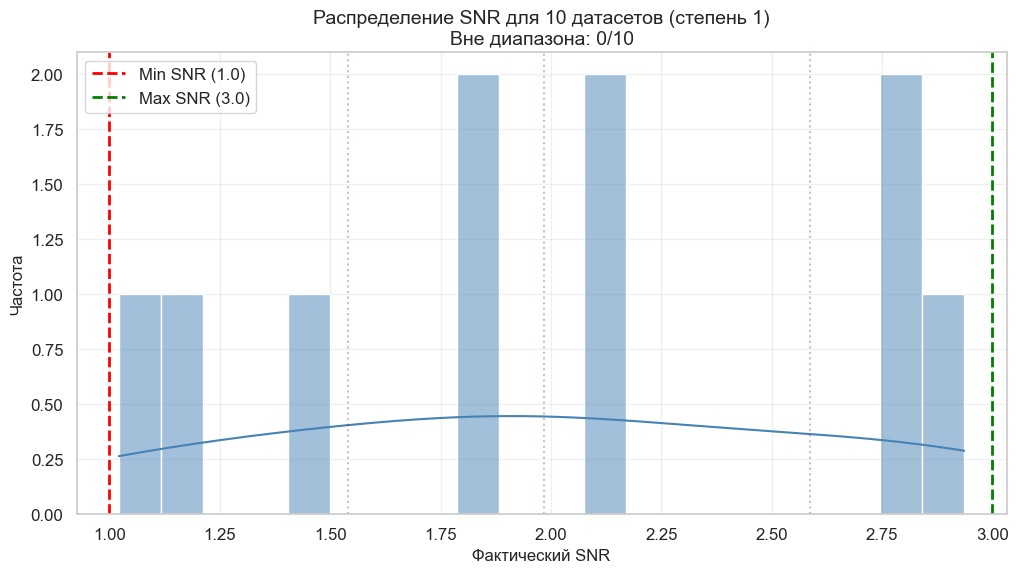

Статистика SNR для 10 датасетов:
Диапазон: [1.0, 3.0]
Минимальный SNR: 1.021
Максимальный SNR: 2.936
Средний SNR: 1.999
Стандартное отклонение: 0.641
Процент в диапазоне: 100.0%

Пример для seed=42:
Целевой SNR: 1.749
Фактический SNR: 1.749
Параметры: coeff_scale=5.00, coeff_offset=1.12


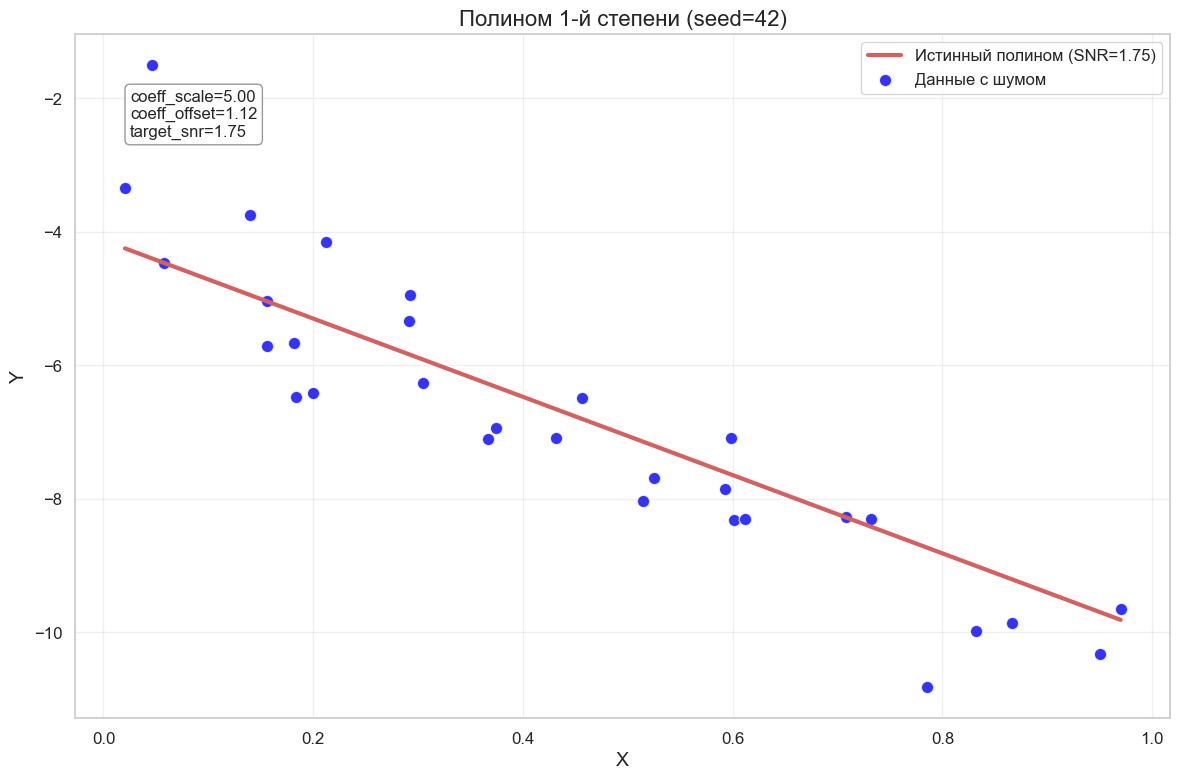

In [18]:
import numpy as np

def generate_dataset_with_target_snr(snr_range, degree, seed):
    """
    Генерирует датасет с SNR в заданном диапазоне, используя единый seed.
    Теперь с гарантией попадания в диапазон и более плотной сеткой параметров.
    
    Parameters:
    snr_range (tuple): Диапазон целевых SNR (min, max)
    degree (int): Степень полинома
    seed (int): Seed для воспроизводимости
    
    Returns:
    tuple: (X, y_noisy, y_true, snr_actual, target_snr, best_scale, best_offset)
    """
    # Устанавливаем seed для воспроизводимости всего процесса
    np.random.seed(seed)
    
    # 1. Определяем целевой SNR в диапазоне
    snr_min, snr_max = snr_range
    target_snr = snr_min + (snr_max - snr_min) * np.random.rand()
    
    # 2. Создаем ПЛОТНУЮ сетку параметров с логарифмическим шагом для scale
    scale_values = np.concatenate([
        np.linspace(0.1, 1.0, 20),    # Очень мелкие значения
        np.linspace(1.0, 5.0, 30),    # Средние значения
        np.linspace(5.0, 20.0, 20)    # Крупные значения
    ])
    
    offset_values = np.concatenate([
        np.linspace(0.01, 0.5, 15),   # Очень маленькие смещения
        np.linspace(0.5, 3.0, 25),    # Средние смещения
        np.linspace(3.0, 10.0, 15)    # Большие смещения
    ])
    
    # 3. Инициализируем переменные
    best_dataset = None
    best_params = None
    min_diff = float('inf')
    
    # 4. Для гарантии попадания в диапазон сначала ищем кандидатов ВНУТРИ диапазона
    candidates = []
    
    # Тестируем все комбинации параметров
    for scale in scale_values:
        for offset in offset_values:
            # Генерируем полином
            y_true, X = generate_polynomial(
                seed=seed,
                degree=degree,
                coeff_scale=scale,
                coeff_offset=offset
            )
            
            # Генерируем ошибки
            errors = generate_error_vector(seed=seed)
            
            # Вычисляем SNR
            snr_actual = np.std(y_true) / np.std(errors)
            
            # Если SNR в целевом диапазоне, добавляем в кандидаты
            if snr_min <= snr_actual <= snr_max:
                diff = abs(snr_actual - target_snr)
                candidates.append((diff, scale, offset, X, y_true, errors, snr_actual))
            else:
                # Запоминаем лучший вариант даже вне диапазона (на случай, если не найдем внутри)
                diff = abs(snr_actual - target_snr)
                if diff < min_diff:
                    min_diff = diff
                    best_params = (scale, offset)
                    best_dataset = (X.copy(), (y_true + errors).copy(), y_true.copy(), snr_actual)
    
    # 5. Выбираем лучший кандидат ИЗ ДИАПАЗОНА, если такие есть
    if candidates:
        # Сортируем по близости к целевому SNR
        candidates.sort(key=lambda x: x[0])
        _, best_scale, best_offset, X, y_true, errors, snr_actual = candidates[0]
        y_noisy = y_true + errors
        best_dataset = (X, y_noisy, y_true, snr_actual)
        best_params = (best_scale, best_offset)
    else:
        # Предупреждение, если не нашли кандидатов в диапазоне (теоретически не должно происходить)
        print(f"ВНИМАНИЕ: Не найдено параметров в диапазоне SNR [{snr_min}, {snr_max}] для seed={seed}")
        print(f"Лучший найденный SNR: {min_diff:.3f}")
    
    # 6. Финальная проверка и корректировка (если нужно)
    X, y_noisy, y_true, snr_actual = best_dataset
    best_scale, best_offset = best_params
    
    # Если всё же вышли за границы (теоретически маловероятно), делаем корректировку
    if snr_actual < snr_min or snr_actual > snr_max:
        # Простой способ корректировки: масштабируем коэффициенты полинома
        scale_factor = target_snr / snr_actual
        y_true_scaled = y_true * np.sqrt(scale_factor)  # SNR зависит от дисперсии (квадрат)
        y_noisy_scaled = y_true_scaled + errors
        snr_corrected = np.std(y_true_scaled) / np.std(errors)
        
        # Возвращаем скорректированный датасет
        return X, y_noisy_scaled, y_true_scaled, snr_corrected, target_snr, best_scale, best_offset
    
    return X, y_noisy, y_true, snr_actual, target_snr, best_scale, best_offset


# Функция для тестирования распределения SNR
def test_snr_distribution(snr_range=(1.0, 3.0), degree=1, num_datasets=100):
    """
    Тестирует распределение SNR для множества датасетов с улучшенной версией функции
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    snr_values = []
    out_of_range_count = 0
    
    for i in range(num_datasets):
        _, _, _, snr_actual, _, _, _ = generate_dataset_with_target_snr(
            snr_range=snr_range,
            degree=degree,
            seed=i
        )
        
        print(i)
        snr_values.append(snr_actual)
        
        if not (snr_range[0] <= snr_actual <= snr_range[1]):
            out_of_range_count += 1
    
    # Визуализация
    plt.figure(figsize=(12, 6))
    sns.histplot(snr_values, bins=20, kde=True, color='steelblue')
    plt.axvline(snr_range[0], color='red', linestyle='--', linewidth=2, label=f'Min SNR ({snr_range[0]})')
    plt.axvline(snr_range[1], color='green', linestyle='--', linewidth=2, label=f'Max SNR ({snr_range[1]})')
    
    # Добавляем вертикальные линии для контроля равномерности
    for q in [0.25, 0.5, 0.75]:
        quantile = np.quantile(snr_values, q)
        plt.axvline(quantile, color='purple', alpha=0.3, linestyle=':')
    
    plt.title(f'Распределение SNR для {num_datasets} датасетов (степень {degree})\n'
              f'Вне диапазона: {out_of_range_count}/{num_datasets}', fontsize=14)
    plt.xlabel('Фактический SNR', fontsize=12)
    plt.ylabel('Частота', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Статистика
    print(f"Статистика SNR для {num_datasets} датасетов:")
    print(f"Диапазон: [{snr_range[0]}, {snr_range[1]}]")
    print(f"Минимальный SNR: {min(snr_values):.3f}")
    print(f"Максимальный SNR: {max(snr_values):.3f}")
    print(f"Средний SNR: {np.mean(snr_values):.3f}")
    print(f"Стандартное отклонение: {np.std(snr_values):.3f}")
    print(f"Процент в диапазоне: {100 * (1 - out_of_range_count/num_datasets):.1f}%")
    
    return snr_values

# Пример использования
if __name__ == "__main__":
    # Тестируем распределение для 200 датасетов
    snr_values = test_snr_distribution(snr_range=(1.0, 3.0), degree=1, num_datasets=10)
    
    # Пример генерации одного датасета
    X, y_noisy, y_true, snr_actual, target_snr, best_scale, best_offset = generate_dataset_with_target_snr(
        snr_range=(1.0, 3.0),
        degree=1,
        seed=42
    )
    
    print(f"\nПример для seed=42:")
    print(f"Целевой SNR: {target_snr:.3f}")
    print(f"Фактический SNR: {snr_actual:.3f}")
    print(f"Параметры: coeff_scale={best_scale:.2f}, coeff_offset={best_offset:.2f}")
    
    # Визуализация примера
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(12, 8))
    sort_idx = np.argsort(X)
    
    plt.plot(X[sort_idx], y_true[sort_idx], 'r-', linewidth=3, label=f'Истинный полином (SNR={snr_actual:.2f})')
    plt.scatter(X, y_noisy, color='blue', s=80, alpha=0.8, edgecolors='w', linewidth=1, label='Данные с шумом')
    
    plt.title(f'Полином {1}-й степени (seed=42)', fontsize=16)
    plt.xlabel('X', fontsize=14)
    plt.ylabel('Y', fontsize=14)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    stats_text = (f"coeff_scale={best_scale:.2f}\n"
                  f"coeff_offset={best_offset:.2f}\n"
                  f"target_snr={target_snr:.2f}")
    plt.annotate(stats_text, xy=(0.05, 0.85), xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
                fontsize=12)
    
    plt.tight_layout()
    plt.savefig('improved_dataset_example.png', dpi=300, bbox_inches='tight')
    plt.show()

# Генерация двумерной смеси

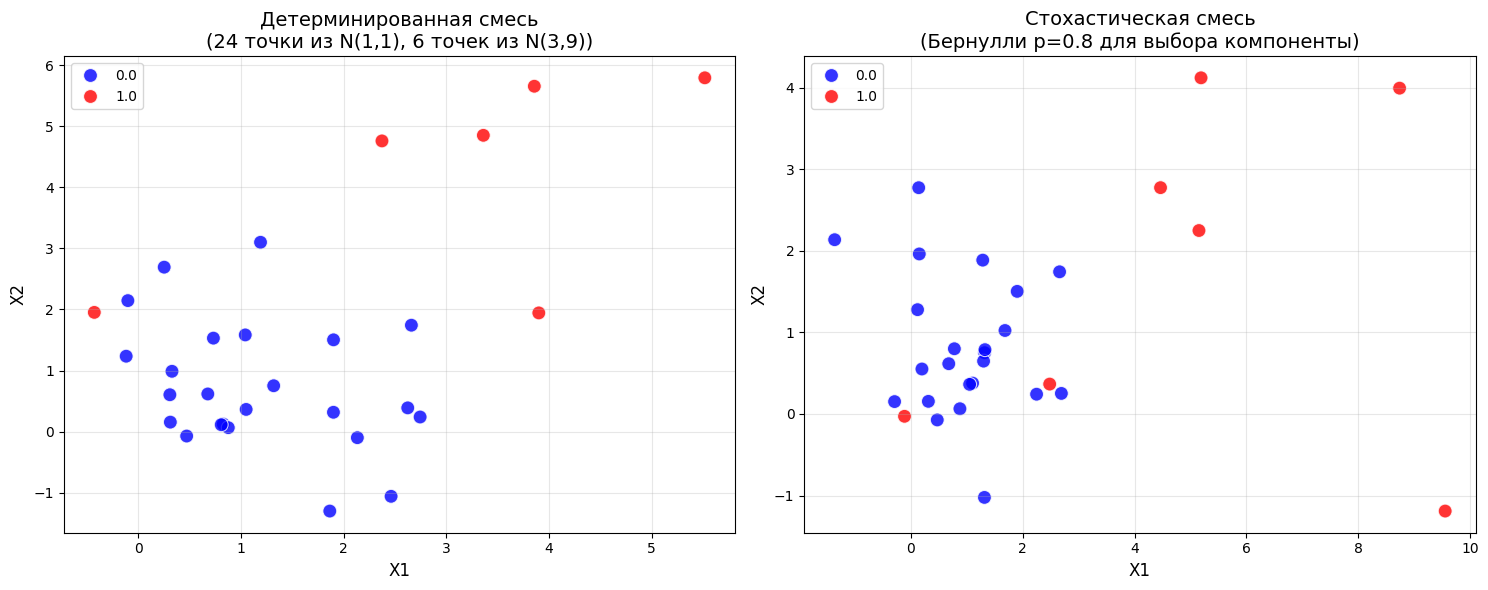

Статистика детерминированной смеси:
Точек из первого распределения: 24 (ожидалось 24)
Точек из второго распределения: 6 (ожидалось 6)

Статистика стохастической смеси:
Точек из первого распределения: 23 (ожидалось ~24)
Точек из второго распределения: 7 (ожидалось ~6)
Фактическое соотношение: 0.77:0.23


In [4]:
import numpy as np
from scipy.stats import multivariate_normal, bernoulli

def generate_deterministic_mixture(seed):
    """
    Генерирует детерминированную смесь: 24 точки из первого распределения и 6 из второго.
    
    Parameters:
    seed (int): Seed для воспроизводимости
    
    Returns:
    np.array: Датасет из 30 точек (30, 2)
    np.array: Метки компонент (0 - первое распределение, 1 - второе)
    """
    np.random.seed(seed)
    
    # Параметры распределений
    mean1 = np.array([1, 1])
    cov1 = np.diag([1, 1])  # Диагональная матрица ковариаций
    
    mean2 = np.array([3, 3])
    cov2 = np.diag([9, 9])  # Диагональная матрица ковариаций
    
    # Генерируем точки
    points1 = multivariate_normal.rvs(mean=mean1, cov=cov1, size=24)
    points2 = multivariate_normal.rvs(mean=mean2, cov=cov2, size=6)
    
    # Создаем метки компонент
    labels1 = np.zeros(24)  # 0 для первого распределения
    labels2 = np.ones(6)    # 1 для второго распределения
    
    # Объединяем точки и метки
    X = np.vstack([points1, points2])
    labels = np.concatenate([labels1, labels2])
    
    # Перемешиваем точки и соответствующие метки
    shuffle_idx = np.random.permutation(len(X))
    X = X[shuffle_idx]
    labels = labels[shuffle_idx]
    
    return X, labels


def generate_stochastic_mixture(seed):
    """
    Генерирует стохастическую смесь: для каждой точки случайно выбирается компонента.
    
    Parameters:
    seed (int): Seed для воспроизводимости
    
    Returns:
    np.array: Датасет из 30 точек (30, 2)
    np.array: Метки компонент (0 - первое распределение, 1 - второе)
    """
    np.random.seed(seed)
    
    # Параметры распределений
    mean1 = np.array([1, 1])
    cov1 = np.diag([1, 1])
    
    mean2 = np.array([3, 3])
    cov2 = np.diag([9, 9])
    
    # Инициализируем массивы для точек и меток
    X = np.zeros((30, 2))
    labels = np.zeros(30)
    
    # Для каждой точки случайно выбираем компоненту
    for i in range(30):
        # Бернуллиевское распределение с p=0.8 для первой компоненты
        component = bernoulli.rvs(p=0.2)
        labels[i] = component
        
        if component == 0:  # Первая компонента
            X[i] = multivariate_normal.rvs(mean=mean1, cov=cov1)
        else:  # Вторая компонента
            X[i] = multivariate_normal.rvs(mean=mean2, cov=cov2)
    
    return X, labels


# Пример использования и визуализации
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Генерируем данные
    X_det, labels_det = generate_deterministic_mixture(seed=1)
    X_stoch, labels_stoch = generate_stochastic_mixture(seed=1)
    
    # Визуализация
    plt.figure(figsize=(15, 6))
    
    # Детерминированная смесь
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=X_det[:, 0], y=X_det[:, 1], hue=labels_det, 
                    palette=['blue', 'red'], s=100, alpha=0.8)
    plt.title('Детерминированная смесь\n(24 точки из N(1,1), 6 точек из N(3,9))', fontsize=14)
    plt.xlabel('X1', fontsize=12)
    plt.ylabel('X2', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Стохастическая смесь
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=X_stoch[:, 0], y=X_stoch[:, 1], hue=labels_stoch, 
                    palette=['blue', 'red'], s=100, alpha=0.8)
    plt.title('Стохастическая смесь\n(Бернулли p=0.8 для выбора компоненты)', fontsize=14)
    plt.xlabel('X1', fontsize=12)
    plt.ylabel('X2', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('mixture_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Статистика для детерминированной смеси
    count1_det = np.sum(labels_det == 0)
    count2_det = np.sum(labels_det == 1)
    
    # Статистика для стохастической смеси
    count1_stoch = np.sum(labels_stoch == 0)
    count2_stoch = np.sum(labels_stoch == 1)
    
    print("Статистика детерминированной смеси:")
    print(f"Точек из первого распределения: {count1_det} (ожидалось 24)")
    print(f"Точек из второго распределения: {count2_det} (ожидалось 6)")
    
    print("\nСтатистика стохастической смеси:")
    print(f"Точек из первого распределения: {count1_stoch} (ожидалось ~24)")
    print(f"Точек из второго распределения: {count2_stoch} (ожидалось ~6)")
    print(f"Фактическое соотношение: {count1_stoch/30:.2f}:{count2_stoch/30:.2f}")

## Функция истинной регрессии

In [5]:
import numpy as np

def true_regression_function(x):
    num = 24 * np.exp(-((x - 1)**2) / 2)
    denom = num + np.exp(-((x - 3)**2) / 18)
    return 3 - num / denom

def true_regression_vectorized(x):
    num = 24 * np.exp(-np.square(x - 1) / 2)
    denom = num + np.exp(-np.square(x - 3) / 18)
    return 3 - num / denom

# Для синтетических датасетов

## Интегральный MSE

In [6]:
from scipy.integrate import quad
import numpy as np

def integral_mse(g_hat, g_true, a=-2, b=8, epsabs=1e-5):
    """
    Вычисляет интегральный MSE: (1/(b-a)) * ∫[a,b] (ĝ(x) - g(x))² dx
    
    Параметры:
    g_hat : callable
        Оценённая регрессия (принимает float, возвращает float)
    g_true : callable
        Истинная регрессия (принимает float, возвращает float)
    a, b : float, optional
        Границы интегрирования (по умолчанию [-2, 8])
    epsabs : float, optional
        Абсолютная точность интегрирования (по умолчанию 1e-5)
    
    Возвращает:
    float
        Значение интегрального MSE
    """
    integrand = lambda x: (g_hat(x) - g_true(x)) ** 2
    integral, _ = quad(integrand, a, b, epsabs=epsabs)
    return integral / (b - a)

## Интегральный MAE

In [7]:
def integral_mae(g_hat, g_true, a=-2, b=8, epsabs=1e-5):
    """
    Вычисляет интегральный MAE: (1/(b-a)) * ∫[a,b] |ĝ(x) - g(x)| dx
    
    Параметры и возвращает:
    То же, что и integral_mse
    """
    integrand = lambda x: abs(g_hat(x) - g_true(x))
    integral, _ = quad(integrand, a, b, epsabs=epsabs)
    return integral / (b - a)

## Максимальная ошибка (MaxErr)

In [8]:
from scipy.optimize import minimize_scalar

def max_error(g_hat, g_true, a=-2, b=8, xatol=1e-5):
    """
    Вычисляет максимальную ошибку: max_{x ∈ [a,b]} |ĝ(x) - g(x)|
    
    Параметры:
    xatol : float, optional
        Абсолютная точность поиска максимума (по умолчанию 1e-5)
    
    Возвращает:
    float
        Значение максимальной ошибки
    """
    # Функция для минимизации: отрицание модуля ошибки
    objective = lambda x: -abs(g_hat(x) - g_true(x))
    
    # Надёжный поиск максимума на интервале
    result = minimize_scalar(
        objective,
        bounds=(a, b),
        method='bounded',
        options={'xatol': xatol}
    )
    
    # Гарантируем корректность даже при сбое оптимизации
    if not result.success:
        # Резерв: оценка на сетке из 100 точек
        x_grid = np.linspace(a, b, 100)
        errors = [abs(g_hat(x) - g_true(x)) for x in x_grid]
        return max(errors)
    
    return -result.fun  # Возвращаем положительное значение ошибки

# Проверка метрик для смеси

In [9]:
import numpy as np
from statsmodels.nonparametric.kernel_regression import KernelReg
from sklearn.model_selection import KFold
from scipy.optimize import minimize

def kernel_regression_silverman(x_train, y_train, x_test):
    x_train = np.asarray(x_train).reshape(-1, 1)
    h = 1.06 * np.std(x_train) * len(x_train)**(-1/5)
    kr = KernelReg(y_train, x_train, var_type='c', bw=[h])
    return kr.fit(x_test.reshape(-1, 1))[0]

def kernel_regression_cv(x_train, y_train, x_test):
    x_train = np.asarray(x_train).reshape(-1, 1)
    x_test = np.asarray(x_test).reshape(-1, 1)
    kf = KFold(5)
    
    def cv_mse(log_h):
        h = np.exp(log_h)
        total_mse = 0
        for train_idx, val_idx in kf.split(x_train):
            kr = KernelReg(y_train[train_idx], x_train[train_idx], var_type='c', bw=[h])
            pred = kr.fit(x_train[val_idx])[0]
            total_mse += np.mean((pred - y_train[val_idx])**2)
        return total_mse / kf.n_splits
    
    h_init = np.log(1.06 * np.std(x_train) * len(x_train)**(-1/5))
    res = minimize(cv_mse, x0=h_init, method='L-BFGS-B')
    best_h = np.exp(res.x[0])
    
    kr_final = KernelReg(y_train, x_train, var_type='c', bw=[best_h])
    return kr_final.fit(x_test)[0]

C:\Users\M A C H R E A T O R\AppData\Local\Temp\ipykernel_26600\730382452.py:23: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, _ = quad(integrand, a, b, epsabs=epsabs)
C:\Users\M A C H R E A T O R\AppData\Local\Temp\ipykernel_26600\3121617411.py:9: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from

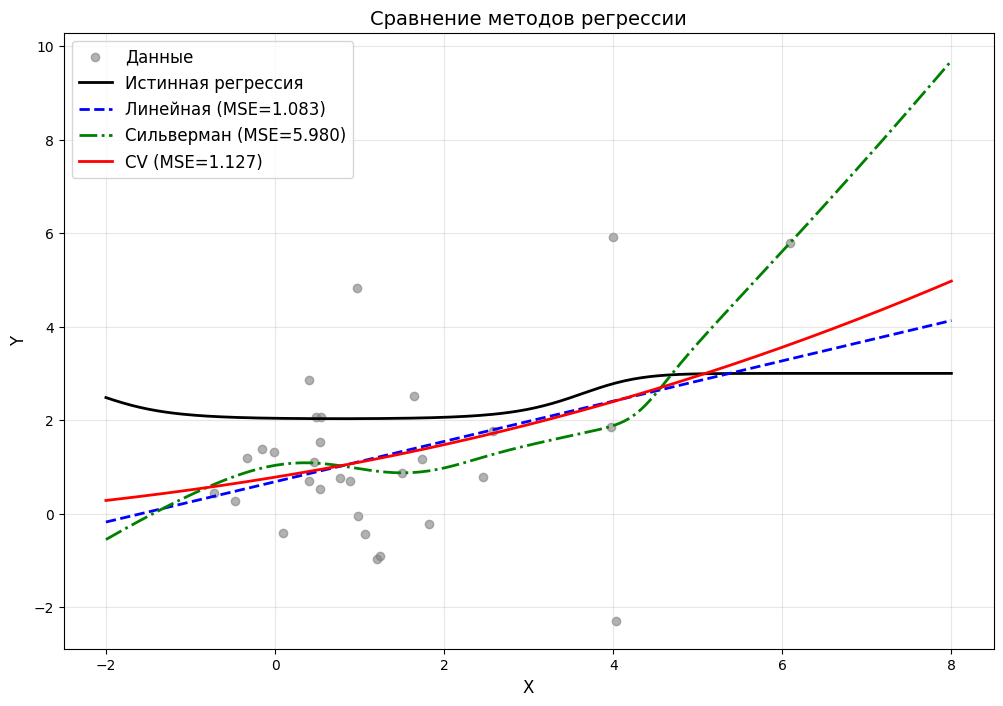


Результаты метрик:
------------------------------------------------------------
Метод        | MSE        | MAE        | MAX       
------------------------------------------------------------
Линейная     | 1.083038 | 0.814488 | 2.661939
Сильверман   | 5.979687 | 1.884082 | 1.167414
CV           | 1.126799 | 0.893124 | 2.200899


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Генерация данных
X, _ = generate_deterministic_mixture(seed=42)
x_train = X[:, 0].ravel()  # X как предиктор (1D массив)
y_train = X[:, 1]  # Y как целевая переменная

# 1. Линейная регрессия (МНК)
lr = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
g_lr = lambda x: lr.predict(np.array([[x]]))[0]

# 2. Ядерная регрессия с правилом Сильвермана
x_grid = np.linspace(-2, 8, 200)
y_silverman = kernel_regression_silverman(x_train, y_train, x_grid)
g_silverman = lambda x: np.interp(x, x_grid, y_silverman)

# 3. Ядерная регрессия с CV подбором h
y_cv = kernel_regression_cv(x_train, y_train, x_grid)
g_cv = lambda x: np.interp(x, x_grid, y_cv)

# 4. Истинная регрессия
g_true = true_regression_function

# 5. Расчет метрик
metrics = {}
for name, g_hat in [
    ('Линейная', g_lr),
    ('Сильверман', g_silverman),
    ('CV', g_cv)
]:
    metrics[name] = {
        'MSE': integral_mse(g_hat, g_true),
        'MAE': integral_mae(g_hat, g_true),
        'MAX': max_error(g_hat, g_true)
    }

# 6. Визуализация
y_true = true_regression_vectorized(x_grid)

plt.figure(figsize=(12, 8))
plt.scatter(x_train, y_train, alpha=0.6, label='Данные', color='gray')
plt.plot(x_grid, y_true, 'k-', linewidth=2, label='Истинная регрессия')
plt.plot(x_grid, lr.predict(x_grid.reshape(-1, 1)), 'b--', linewidth=2, 
         label=f'Линейная (MSE={metrics["Линейная"]["MSE"]:.3f})')
plt.plot(x_grid, y_silverman, 'g-.', linewidth=2, 
         label=f'Сильверман (MSE={metrics["Сильверман"]["MSE"]:.3f})')
plt.plot(x_grid, y_cv, 'r-', linewidth=2, 
         label=f'CV (MSE={metrics["CV"]["MSE"]:.3f})')
plt.legend(fontsize=12)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('Сравнение методов регрессии', fontsize=14)
plt.grid(alpha=0.3)
plt.savefig('regression_comparison_new.png', dpi=300, bbox_inches='tight')
plt.show()

# 7. Вывод результатов
print("\nРезультаты метрик:")
print("-" * 60)
print(f"{'Метод':<12} | {'MSE':<10} | {'MAE':<10} | {'MAX':<10}")
print("-" * 60)
for name, vals in metrics.items():
    print(f"{name:<12} | {vals['MSE']:.6f} | {vals['MAE']:.6f} | {vals['MAX']:.6f}")